In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
energy_data = pd.read_csv('data_energie_geo.csv')

/Users/youngmavericks/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
energy_data.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,jaar,Soort,LON,LAT,POSTCODE
0,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AC,4611AD,BERGEN OP ZOOM,100.0,17.0,100.0,NaN,NaN,496.0,0.0,NaN,2009,gas,4.289888,51.490049,4611AC
1,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AE,4611AE,BERGEN OP ZOOM,100.0,11.0,100.0,NaN,NaN,355.0,0.0,NaN,2009,gas,4.289900,51.489527,4611AE
2,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AG,4611AJ,BERGEN OP ZOOM,100.0,24.0,100.0,NaN,NaN,3074.0,0.0,NaN,2009,gas,4.287819,51.491995,4611AG
3,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AK,4611AK,BERGEN OP ZOOM,100.0,14.0,100.0,NaN,NaN,13456.0,0.0,NaN,2009,gas,4.288833,51.490222,4611AK
4,Enexis B.V.,ENEXIS,Zuid - Oostsingel,4611AL,4611BA,BERGEN OP ZOOM,100.0,23.0,100.0,NaN,NaN,10096.0,0.0,NaN,2009,gas,4.291568,51.490593,4611AL


# prepare data for comparison

In [5]:
# inactive connections
inactive = energy_data[energy_data['perc_of_active_connections']== 0.0]

#data without the data from inactive connections
data = energy_data[energy_data['perc_of_active_connections']!= 0.0]
data['num_active_connections'] = round(data['perc_of_active_connections']*data['num_connections']/100)
data['consume_per_connection'] = data['annual_consume']/data['num_active_connections']

#data with inactive connections (number of active connections can be zero which leads to divide by zero errors so inactive connections in analysis)
alldata = energy_data.copy()
alldata['consume_per_connection'] = alldata['annual_consume']/alldata['num_connections']




/Users/youngmavericks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/youngmavericks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
#consume for inactive connections (unclear what inactive means since there is still annual consume.. )
inactive.groupby('jaar')['annual_consume'].sum()

jaar
2008    2045931.0
2009    2517126.0
2010    2854248.0
2011    3190265.0
2012    2684523.0
2013    3389225.0
2014    3542744.0
2015    3956622.0
2016    4141991.0
2017    7155128.0
2018    3735691.0
Name: annual_consume, dtype: float64

In [106]:
data.groupby(['Soort','jaar'])['consume_per_connection'].mean()

Soort        jaar
electricity  2008    255.020445
             2009    261.301928
             2010    261.499634
             2011    262.267231
             2012    259.853573
             2013    260.480650
             2014    251.275399
             2015    247.572692
             2016    242.916509
             2017    252.179386
             2018    243.269264
gas          2008    105.171550
             2009    110.245370
             2010    109.746964
             2011    107.957751
             2012    105.519318
             2013    103.549654
             2014     99.801234
             2015     97.352553
             2016     96.446341
             2017    100.556633
             2018     98.799285
Name: consume_per_connection, dtype: float64

In [145]:
#calculate the total, mean and standard deviations for gas and electricity consume for each year
def make_df(data):
    df = pd.DataFrame({})
    if 'electricity' in data['Soort'].unique() and 'gas' in data['Soort'].unique():
        df['year'] = sorted(data.groupby(['Soort'])['jaar'].unique().values[0])
    if 'electricity' in data['Soort'].unique():
        df['elec_year'] = sorted(data.groupby(['Soort'])['jaar'].unique().values[0])
        if 'num_active_connections' in data.columns:
            df['total_elec_aansl'] = data.groupby(['Soort','jaar'])['num_active_connections'].sum().values[:11]#first 11 are all gas, first is 2008, 11th is 2018
        else:
            df['total_elec_aansl'] = data.groupby(['Soort','jaar'])['num_connections'].sum().values[:11]
        df['total_elec'] = data.groupby(['Soort','jaar'])['annual_consume'].sum().values[:11]
        df['mean_elec'] = data.groupby(['Soort','jaar'])['consume_per_connection'].mean().values[:11]
        df['std_elec'] = data.groupby(['Soort','jaar'])['consume_per_connection'].std().values[:11]
        df['mean_elec2']=df['total_elec']/df['total_elec_aansl'] 
        
    if 'gas' in data['Soort'].unique():
        df['gas_year'] = sorted(data.groupby(['Soort'])['jaar'].unique().values[-1])
        if 'num_active_connections' in data.columns:
            df['total_gas_aansl'] = data.groupby(['Soort','jaar'])['num_active_connections'].sum().values[-11:]
        else:
            df['total_gas_aansl'] = data.groupby(['Soort','jaar'])['num_connections'].sum().values[-11:]
        df['total_gas'] = data.groupby(['Soort','jaar'])['annual_consume'].sum().values[-11:]
        df['mean_gas'] = data.groupby(['Soort','jaar'])['consume_per_connection'].mean().values[-11:]
        df['std_gas'] = data.groupby(['Soort','jaar'])['consume_per_connection'].std().values[-11:]
        df['mean_gas2']=df['total_gas']/df['total_elec_aansl']
    
    return df

In [146]:
df = make_df(data)
df

,year,elec_year,total_elec_aansl,total_elec,mean_elec,std_elec,mean_elec2,gas_year,total_gas_aansl,total_gas,mean_gas,std_gas,mean_gas2
0,2008,2008,4842868.0,9.760813e+08,255.020445,307.983177,201.550249,2008,4020897.0,3.449148e+08,105.171550,91.187769,71.221175
1,2009,2009,7203738.0,1.514498e+09,261.301928,291.802673,210.237781,2009,5780096.0,5.234321e+08,110.245370,90.058433,72.661185
2,2010,2010,7272395.0,1.522823e+09,261.499634,292.956199,209.397744,2010,5879276.0,5.286582e+08,109.746964,89.835704,72.693829
3,2011,2011,7373562.0,1.540546e+09,262.267231,304.800148,208.928264,2011,6086733.0,5.372403e+08,107.957751,89.788924,72.860351
4,2012,2012,7491185.0,1.544792e+09,259.853573,307.119859,206.214571,2012,6184566.0,5.323879e+08,105.519318,88.438735,71.068581
5,2013,2013,7471467.0,1.528195e+09,260.480650,358.738986,204.537507,2013,6205837.0,5.233764e+08,103.549654,87.616822,70.050013
6,2014,2014,7507164.0,1.481818e+09,251.275399,317.892724,197.387245,2014,6226629.0,5.048588e+08,99.801234,87.601529,67.250271
7,2015,2015,7548652.0,1.458358e+09,247.572692,324.689332,193.194446,2015,6252580.0,4.933513e+08,97.352553,85.721972,65.356210
8,2016,2016,7727807.0,1.456848e+09,242.916509,333.784731,188.520176,2016,6695706.0,5.231923e+08,96.446341,83.604291,67.702559
9,2017,2017,7820989.0,1.502612e+09,252.179386,360.691094,192.125580,2017,6745863.0,5.436497e+08,100.556633,93.595810,69.511636


In [147]:
alldf = make_df(alldata)
alldf

,year,elec_year,total_elec_aansl,total_elec,mean_elec,std_elec,mean_elec2,gas_year,total_gas_aansl,total_gas,mean_gas,std_gas,mean_gas2
0,2008,2008,5006256.0,9.778573e+08,240.240142,245.208795,195.327060,2008,4079460.0,3.451847e+08,103.014736,83.651449,68.950662
1,2009,2009,7384680.0,1.516647e+09,250.534656,244.313366,205.377456,2009,5846049.0,5.238004e+08,108.571131,83.192143,70.930678
2,2010,2010,7471615.0,1.525213e+09,249.546696,243.415937,204.134331,2010,5955365.0,5.291225e+08,107.835466,82.444101,70.817684
3,2011,2011,7588470.0,1.543234e+09,249.354985,245.881006,203.365673,2011,6170663.0,5.377418e+08,105.910215,81.522418,70.863003
4,2012,2012,7728495.0,1.546873e+09,245.706415,244.353909,200.151948,2012,6281114.0,5.329906e+08,103.249805,79.854668,68.964343
5,2013,2013,7761444.0,1.530847e+09,242.289728,242.074757,197.237380,2013,6314461.0,5.241139e+08,101.064326,78.304015,67.527890
6,2014,2014,7816466.0,1.484469e+09,233.607632,234.721266,189.915666,2014,6347317.0,5.057506e+08,97.121576,75.553690,64.703233
7,2015,2015,7884611.0,1.461266e+09,228.459830,232.390279,185.331385,2015,6389551.0,4.943997e+08,94.478977,73.543329,62.704385
8,2016,2016,8081117.0,1.459899e+09,223.231104,229.516046,180.655602,2016,6841816.0,5.242828e+08,93.652684,72.926756,64.877514
9,2017,2017,8212339.0,1.508453e+09,231.219327,256.876348,183.681267,2017,6909049.0,5.449641e+08,97.433496,80.641810,66.359181


# Graphs

In [154]:
"""
Creates two rows of plots for every variable in the inputlist. 
The first row contains all the plots in wich the variables are derived from the df with only active connections.
In the next row the plots for the same variables are shown but then derived from the df with all the data.
"""
def showplots(df,alldf,x_var,y_variablelist):
    fig, axes = plt.subplots(2,len(y_variablelist),figsize=(20,8))
    fig.tight_layout(pad=4.0)
    for i in range(0,len(y_variablelist)):
        df.plot(x=x_var, y = y_variablelist[i],ax = axes[0,i],title = 'active connections')
        alldf.plot(x=x_var, y = y_variablelist[i],ax = axes[1,i], title = 'all connections')



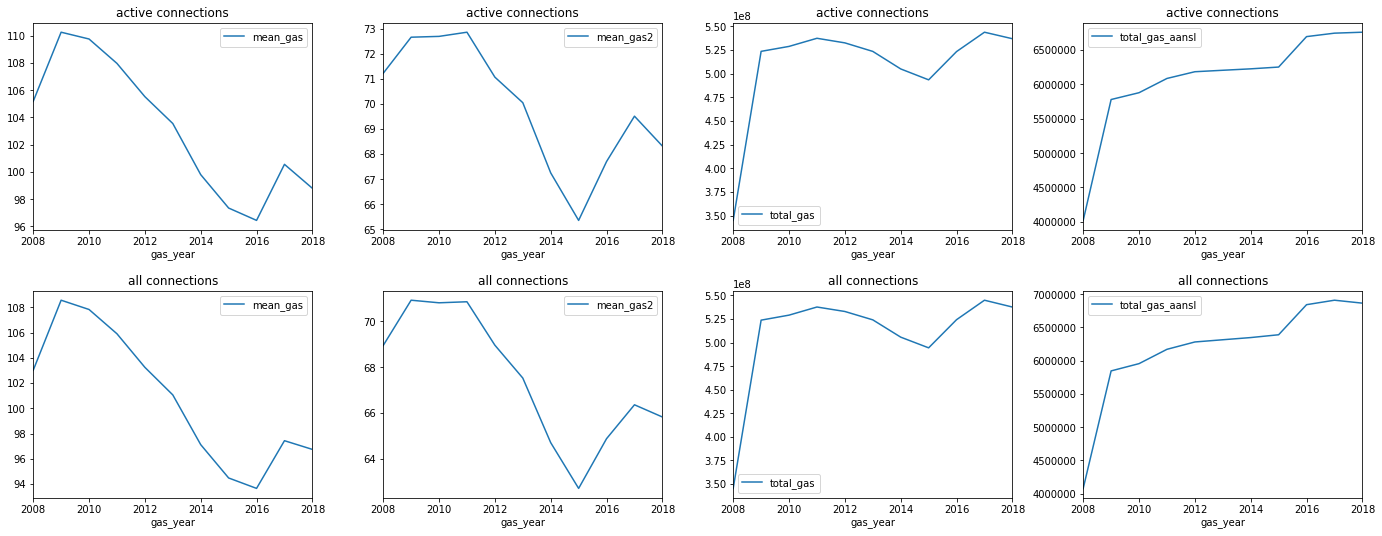

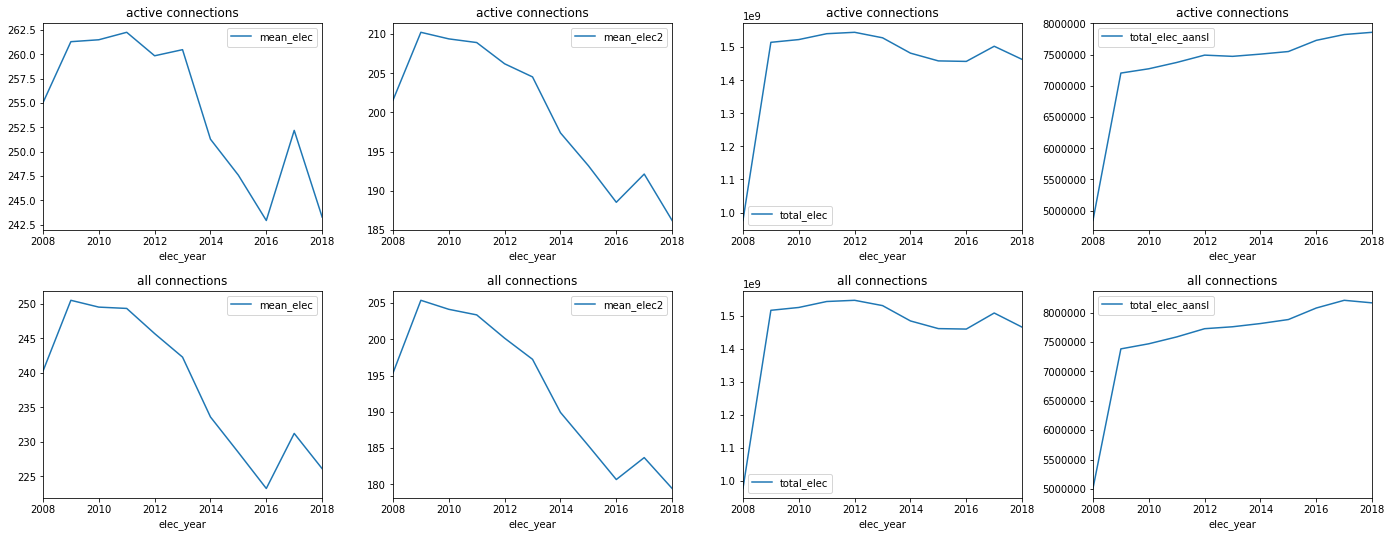

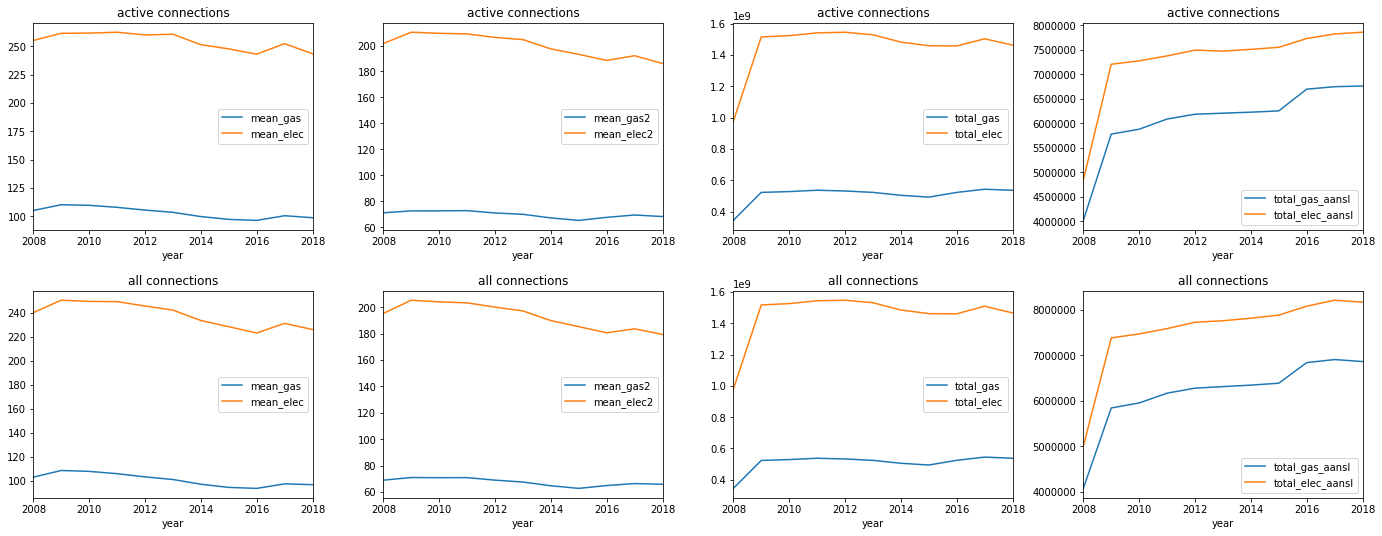

In [155]:
showplots(df,alldf,'gas_year', ['mean_gas','mean_gas2','total_gas','total_gas_aansl'])
showplots(df,alldf,'elec_year',['mean_elec','mean_elec2','total_elec','total_elec_aansl'])
showplots(df,alldf,'year',[['mean_gas','mean_elec'],['mean_gas2','mean_elec2'],['total_gas','total_elec'],['total_gas_aansl','total_elec_aansl']])

# Differences between cities

In [156]:
delft = data[data['city']=='DELFT']
utrecht = data[data['city']=='UTRECHT']
amsterdam = data[data['city']=='AMSTERDAM']
giethoorn = data[data['city']=='GIETHOORN']
alldelft = alldata[alldata['city']=='DELFT']
allutrecht = alldata[alldata['city']=='UTRECHT']
allamsterdam = alldata[alldata['city']=='AMSTERDAM']
allgiethoorn = alldata[alldata['city']=='GIETHOORN']

In [157]:
delft_df = make_df(delft)
utrecht_df = make_df(utrecht)
amstersdam_df = make_df(amsterdam)
giethoorn_df = make_df(giethoorn)
alldelft_df = make_df(alldelft)
allutrecht_df = make_df(allutrecht)
allamstersdam_df = make_df(allamsterdam)
allgiethoorn_df = make_df(allgiethoorn)

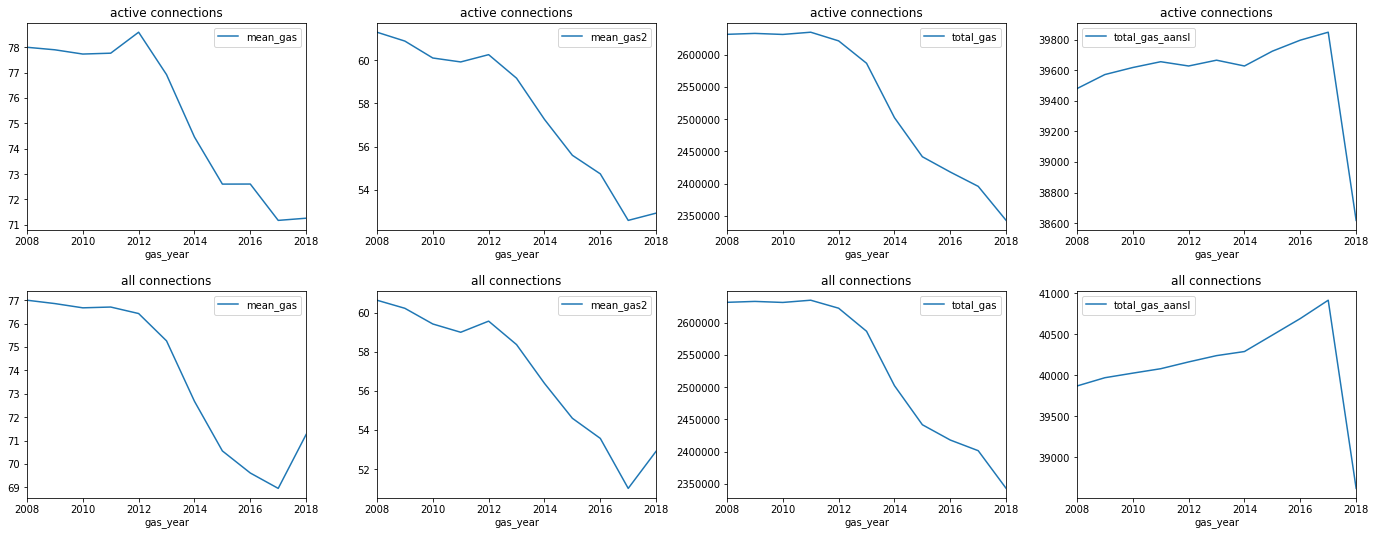

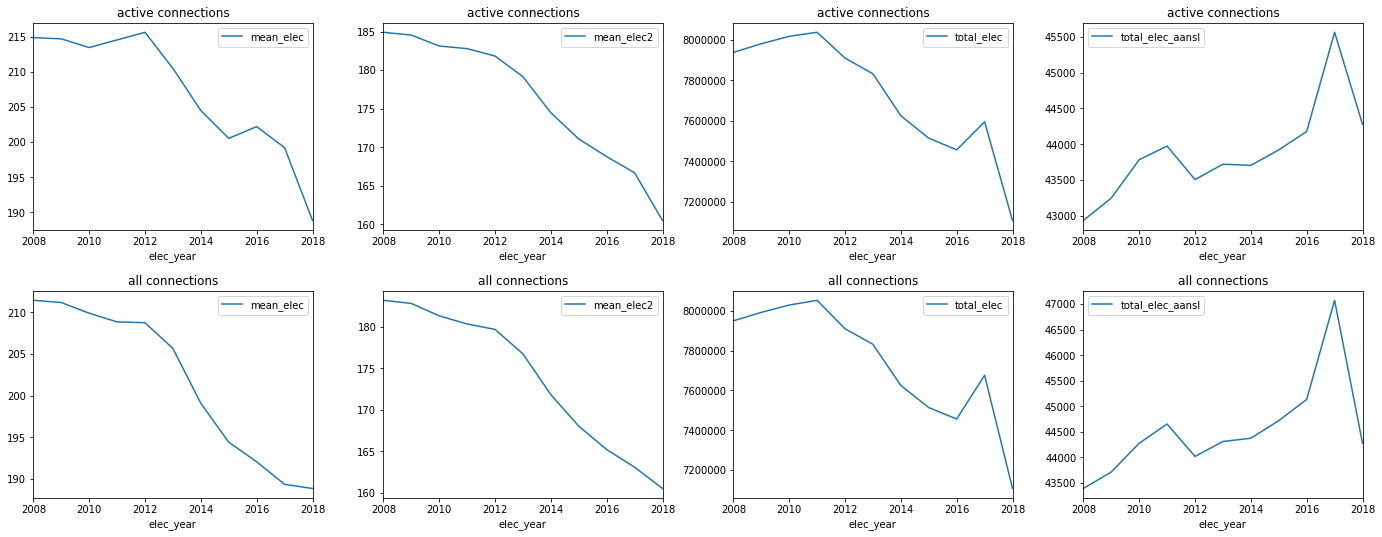

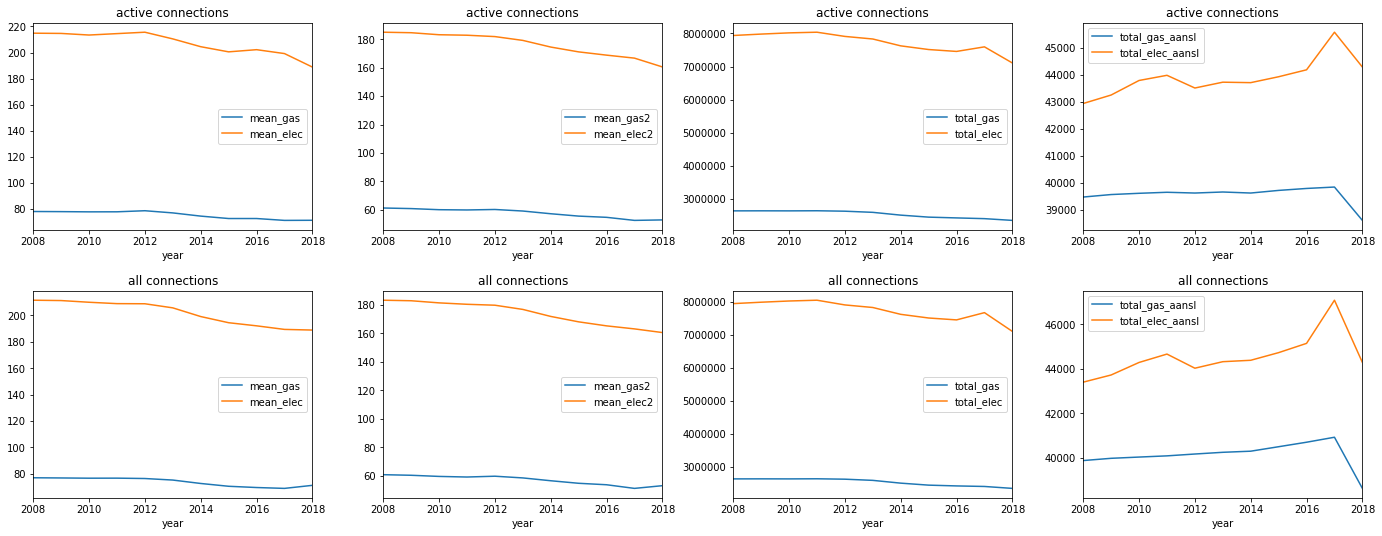

In [158]:
showplots(delft_df,alldelft_df,'gas_year', ['mean_gas','mean_gas2','total_gas','total_gas_aansl'])
showplots(delft_df,alldelft_df,'elec_year',['mean_elec','mean_elec2','total_elec','total_elec_aansl'])
showplots(delft_df,alldelft_df,'year',[['mean_gas','mean_elec'],['mean_gas2','mean_elec2'],['total_gas','total_elec'],['total_gas_aansl','total_elec_aansl']])

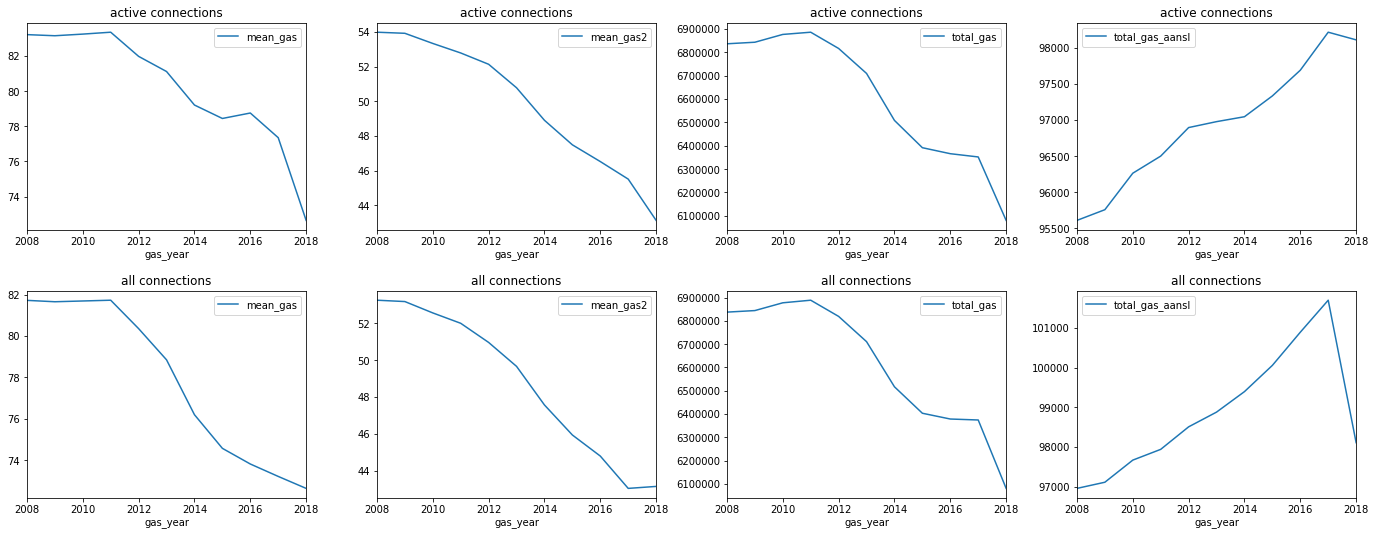

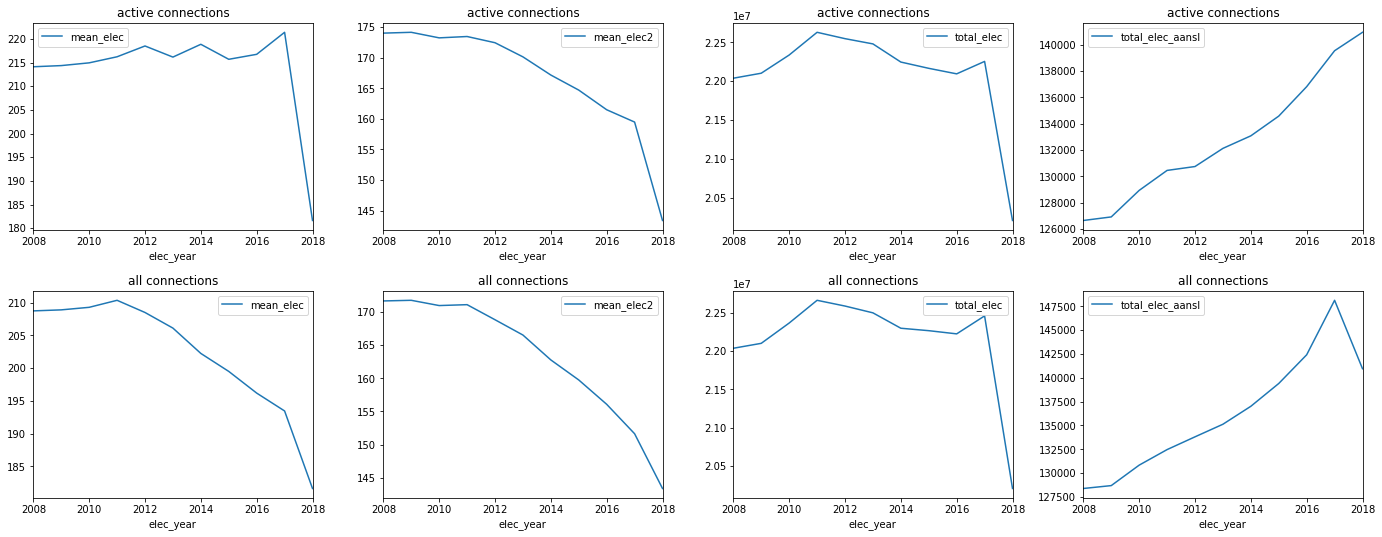

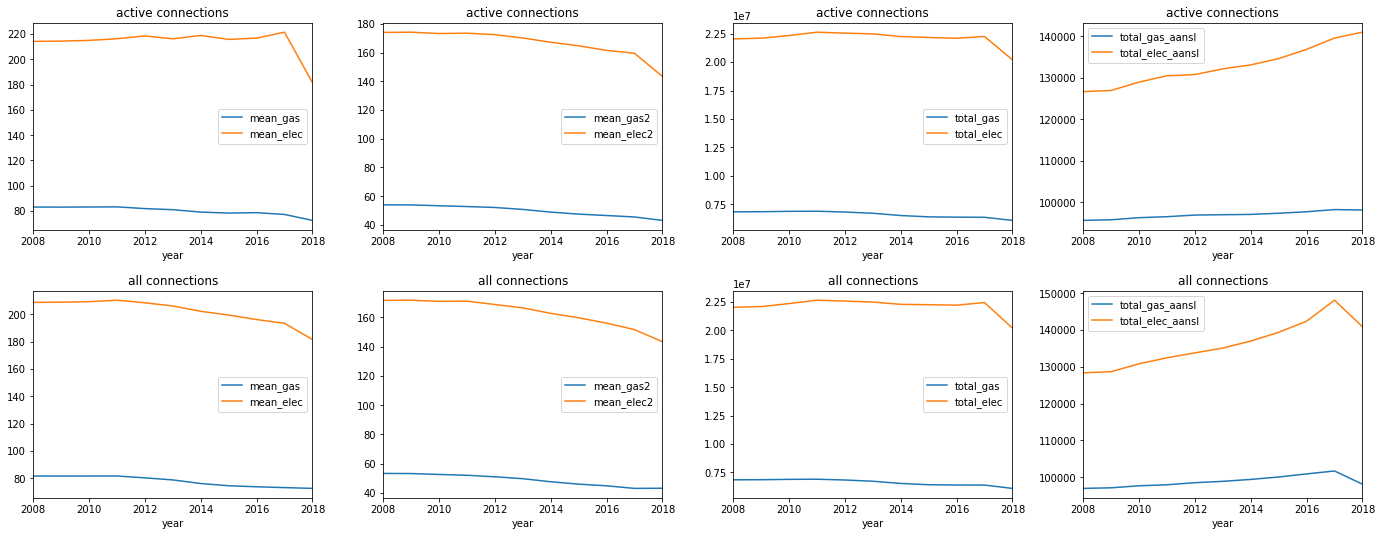

In [159]:
showplots(utrecht_df,allutrecht_df,'gas_year', ['mean_gas','mean_gas2','total_gas','total_gas_aansl'])
showplots(utrecht_df,allutrecht_df,'elec_year',['mean_elec','mean_elec2','total_elec','total_elec_aansl'])
showplots(utrecht_df,allutrecht_df,'year',[['mean_gas','mean_elec'],['mean_gas2','mean_elec2'],['total_gas','total_elec'],['total_gas_aansl','total_elec_aansl']])